# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis)  but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

Don't worry if none of these make sense now, we're going to go through each.



## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [ ]:
  !pip install tensorflow==2.3.0
  !pip install keras==2.3.0

     |████████████████████████████████| 320.4 MB 39 kB/s 
     |████████████████████████████████| 20.1 MB 61.0 MB/s 
     |████████████████████████████████| 459 kB 54.2 MB/s 
     |████████████████████████████████| 2.9 MB 40.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:


     |████████████████████████████████| 377 kB 5.2 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
# Import TensorFlow
import tensorflow as tf
# import keras
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
# from keras.models import Sequential

2.3.0


## Creating a Data to view and fit

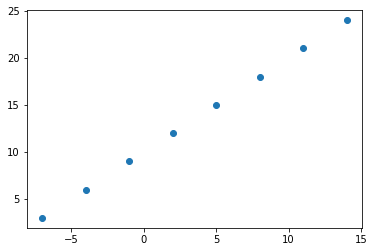

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize
plt.scatter(X,y);

In [ ]:
# End result we should get
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shape

In [ ]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathrom","garage"])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathrom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape ,output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn Numpy array into Tensors
X=tf.cast(tf.constant(X), dtype=tf.float32)
y=tf.cast(tf.constant(y), dtype=tf.float32)
X ,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape
# No demension means it is scaler value

(TensorShape([]), TensorShape([]))

## Step in modeling with Tensorflow
1. **Creating a model** -define the input and output layer , as well as the hidden layer of deeplearing model
2. **Compiling model** - define the loss function ( in other words , the function which tell our model how wrong it is) and optimizer ( tell our model to improve how to imprive the patterens its learning ) and evaluation metrics ( what we can use to interpret the proformance of our model 
3. **fitting a model** - letting a the model try to find patterns between X & y (features and labels)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1- create a model using a sequential API
model=tf.keras.Sequential([
tf.keras.layers.Dense(1)
])
# Other Method to declare layers
# model=tf.keras.sequential()
# model.add(tf.keras.layers.Dense(1))

# 2- Compile the Model
model.compile(loss=tf.keras.losses.mae ,# mae stands for mean absolute error,
              optimizer=tf.keras.optimizers.SGD(),# sgd stands for stochastic gradient descent
              metrics=["mae"])
# 3- fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # for tensor flow 2.7+
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 3ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a predection using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred+11

array([[23.71602]], dtype=float32)

## Improving our Model
we can improve our model , by altering the steps we took to create a model
1. **Creating Model** - here we might add more layers , increae the number of hidden units (also called neurons), change the activation function of layer .
2. **Compiling a mddel** - here we might change the optimization function or perhanps **learning rate**  of the optimization function
3. **Fitting Model** - here we might fit the model for more **epoch** (leave it training for longer) or more data (gives the model more examples to learnfrom)

In [ ]:
# Lets rebuild the model
# 1. Create the model
model=tf.keras.Sequential([
tf.keras.layers.Dense(1)
])
# 2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# 3.fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 2ms/

In [ ]:
# Let see our model pridiction has improved ...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# let seen if we make an other  model to improve anther model
# 1. Create  the model ( this time with with an extra layer with 100 hidden units)
model=tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation=None),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7

In [ ]:
# Let remind ourself a data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# lets try to make a pridict
model.predict([17.0])
# model is overfiting

array([[26.583529]], dtype=float32)

 ## Evaluating a model
In practice, a tipical workflow you will go through when building neural network is:
```
Build a model-> fit a model ->evaluate it -> tweak a model-> fit it evaluate it tweak a model -> fit it -> evaluate it .....


When it comes to evaluation ... there are three words you should memorize:
> "Visualize, Visualize visualize "
Its a good idea to visualize :
* The data - what data ara we working with ? what does it look like ?
* The Model it self - what does our model like 
* The training of the model - how does a model perform while it learn?
* The Pridiction of the model - how do the pridiction of of a model line up against the ground truth ( the orignal labels)


In [ ]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make label work the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

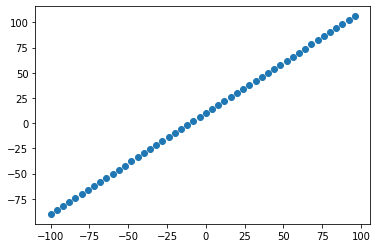

In [ ]:
# Visual the data
import matplotlib.pyplot as plt
plt.scatter(X,y) 

### The Three Sets ...
* **Training set** - the model learnfrom this data, which is typically 70-80% of the total data you have available 
* **Validation set** - the model gat tunned on this data , which is typically 10-15% of the data available .
* **Test set** - the model get evaluate on this data to test what is has learned , this set is typically 10-15% of the total data available .


In [ ]:
# Check the length of how many samples we have 
len(X) 

50

In [ ]:
# Split the dataset into train and test sets
X_train=X[:40]  # first 40 are training samples
y_train=y[:40]


X_test=X[40:]    #last 10 testing samples (20% of the data)
y_test=y[40:]

len(X_train),len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data
Now we got the data in training and test sets... Lets visualize it again!

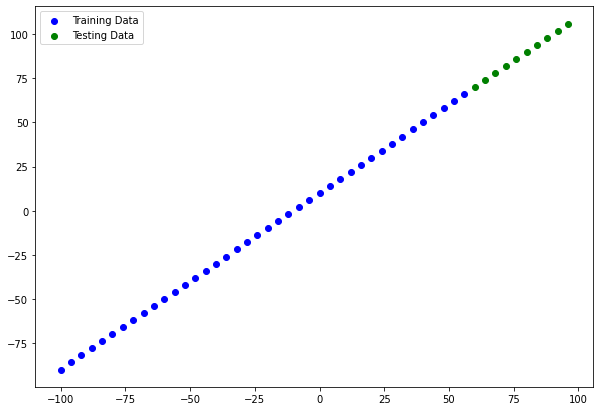

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training Data")
# plot the test data in green
plt.scatter(X_test,y_test,c="g",label="Testing Data")
# Show legend
plt.legend()



In [ ]:
# lets have a look how to build a neural network for data
# 1. Create a model
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
# model.fit(X_train, y_train,epochs=100)



### Vuisualize the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
X[0].shape, X[0],y[0]

(TensorShape([]),
 <tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Lets create a model which build automatically by defining the input_shape argument in the the first layer
tf.random.set_seed(42)
# 1. Create a model (same as above)
model=tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
  tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model.summary()
# Dense means for "Fully Connected Layer"

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Parameters -total  number of parameters in the model.
* Trainable parameters - these are parameters (patterns ) the model can update as it train 
* Non-trainable parameters - these parameters aren't updated during training ( this is typical as we learned patterns or or parameters from other model during ** transfer learning **

 📖 **Resources:** MIT's Introduction to Deep Learning video 

 🛠 **EXercise:**Try playing around with the number of hidden units in the dense layer, see how that effect the number of parameters (total and trainable )
 by calling `model.summary()`


In [ ]:
# Lets fit the model to the training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
# Get the summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


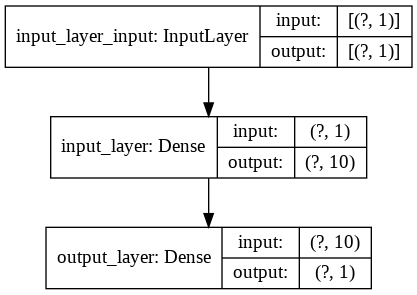

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualize our model pridiction
To visualize our model prediction , it is  good idea to plot them against the ground truth labels 

Often you will see this in the form of `y_test ` or `y_true`versues `y_preds` (ground truth verses your model pridictions)


In [ ]:
# Make some pridiction 
y_pred=model.predict(X_test)
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If yyou feel like you are going to reuse some kind of functionality in the future , it is a good idea to turn it into function 

In [ ]:
# Let Create a ploting function
def plot_prediction (train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  plots training data , test data and compare pridictions t ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot Training data in blue
  plt.scatter(train_data, train_labels,c="b",label="Training Data")
  # plot Testing data in Green
  plt.scatter(test_data,test_labels,c="g", label="Testing Data")
  # Plot model pridection in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend();

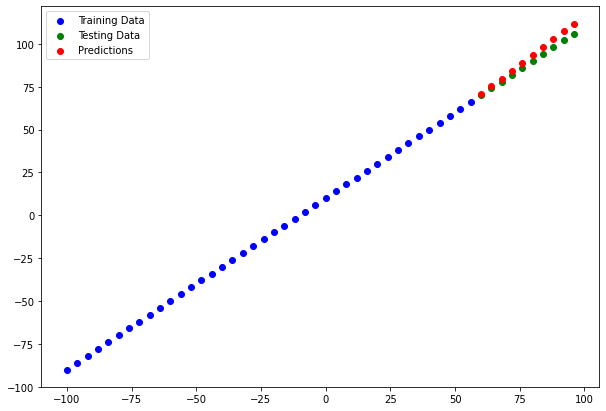

In [ ]:
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluating our models with predictions with regression evaluation metrics 

Depending on the problem you are working on there will be different evaluation metrics to evalute yours model's performance

Scince we are working on a regression , two of the main metrics:
* MAE - mean absolute error ,"On average how wrong is each of my model prediction"
* MSE - mean square errors,"square the average error "


In [ ]:
# Evalute the model on test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 4ms/step - loss: 3.1969 - mae: 3.1969


[3.196941375732422, 3.196941375732422]

In [ ]:
# Calculte the mean absolute error
# if we are comparing differnt value they should be of same type and same shape
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                              y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [ ]:
# Calculte the mean Square error
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [ ]:
# Make some Function for MAE and MSE 
def mae(y_true , y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true
                                        , y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))


In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

## Running Experiments to improve our model

```
build a model -> fit it -> evaluate it  -> tweak it ->fit it ->evaluate it.
```
1. Get more data - get more examples  for your model to train on (more opportunities  to learn patterns or relationships between features and labels).
2. make your model larger(using more complex model ) - this might comes in the form of more layers or more hidden units in each layer .
3. Train for longer - give your model more of chance to find pattern in the data .

Let's do three modeling experiments:
1. `model_1`-same as orignal model , 1 layer trained for 100 epochs.
2. `model_2` -2 layers trained for 100 epochs
3. `model_3` -2layers trained for 500 epochs

**Build `model_1`**

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

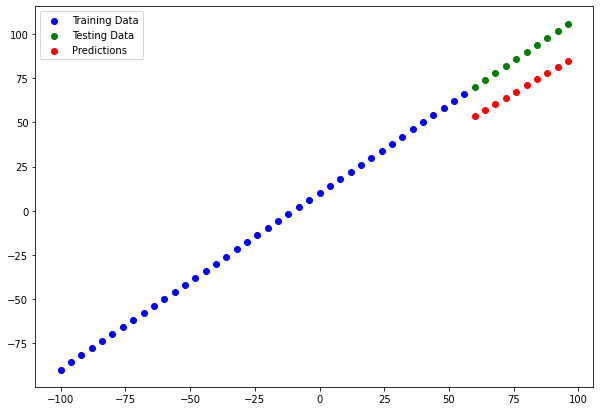

In [ ]:
# Make and plot prediction for model_1
y_pred_1=model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [ ]:
tf.constant(y_pred_1), tf.squeeze(y_pred_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [ ]:
# calculte the model_1 evaluation metics
mae_1=mae(y_test,y_pred_1)
mse_1=mse(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**
* 2 dense layer trained for 100 epochs

In [ ]:
tf.random.set_seed(42)
# 1. Create a model 
model_2=tf.keras.Sequential([
tf.keras.layers.Dense(10,input_shape=[1]),
tf.keras.layers.Dense(1)
])
# 2. Compie the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
# 3.fit the model
model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8687 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

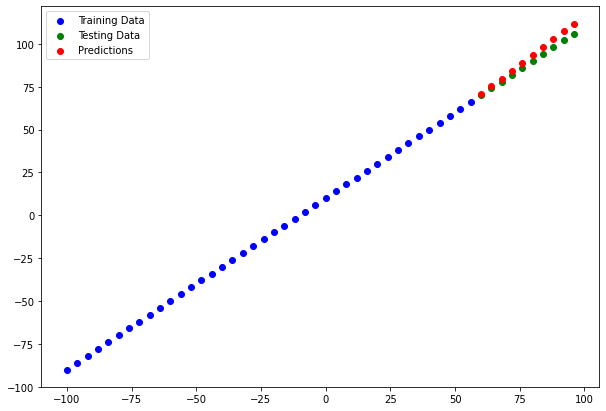

In [ ]:
# Make and plot the pridiction
y_preds_2=model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

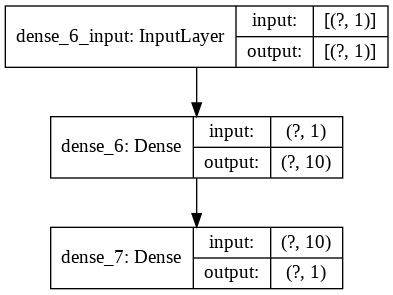

In [ ]:
plot_model(model=model_2,show_shapes=True)

In [ ]:
# Calculate model_2 evaluation matrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`:**
2 layers, and epochs 500

In [ ]:
tf.random.set_seed(43)
#1.  Create a model
model_3=tf.keras.Sequential([
   tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
# 3. fit model
model_3.fit(X_train,y_train,epochs=500,verbose=True)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 50.1982 - mse: 3673.0911
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 23.4502 - mse: 795.4595
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 12.7637 - mse: 228.7486
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 15.8082 - mse: 309.6552
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 12.0662 - mse: 177.2198
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 11.9612 - mse: 225.4940
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 12.9814 - mse: 256.5032
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 20.4196 - mse: 610.8970
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 27.0439 - mse: 1218.9379
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 11.4052 - mse: 204.1035
Epoch 11/500
2/2 [=============================

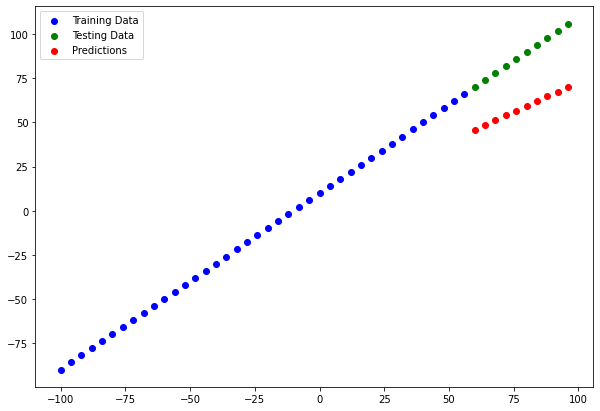

In [ ]:
# make and plot prediction of model_3
y_preds_3=model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=29.980906>,
 <tf.Tensor: shape=(), dtype=float32, numpy=913.2287>)

🔑**Note:** You want to start with small experiments(small experiments) and make sure they work and then increase their scale when necessary .

### Comparing the result of our experiments

we have run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd
model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,29.980906,913.228699


Looks like `model_2` performed the best ...

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


>🔑 **Note:**  One of your main goal should be to minimize the the time between your experiments . The more experiments ypu do, the more things you will figure out which don't work and in turn, get closser to figuring out what does work.Remenber the machine learning practionar's motto : "experiment ,experiment experiment "



## Tracking your experiments

One really good habbit in machine learning modeling is to track the result of your experiments.

And when doing so, it can be tidious if you are running lots of experiments.

Luckily , there are tools to help us!

📖 **Resources:** As you build more models, you will want to lookinyo using into using

* TensorBoard - a component of the Tensor library to help track model experiments (we will see this one later.)

* Weights & Biases - a tool to for tracking all kinds of machine learning experiments (plugs straights into TensorBoard)



## Saving our models
Saving our models allow us to use them outside of Google colab (or where ever they are trained ) such as in web application or a modile application.

There are two main formats we can save our model's tool :


1. The SaveModel format  (.pb)
2. The HDF5  format      (.h5)


In [ ]:
# Save the model using SaveModel Format
model_2.save("best_model_SaveModel_format")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [ ]:
# Save the model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in the save model

In [ ]:
# load in the Save model format
from keras.models import load_model
loaded_SavedModel_format=tf.keras.models.load_model("best_model_SaveModel_format")
loaded_SavedModel_format.summary()

Using TensorFlow backend.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  Compare model_2 predictions with SavedModel format predictions
model_2_preds=model_2.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)
model_2_preds==loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Comapre the MAE of model_2 preds and  loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds)==mae(y_true=y_test,y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# load in a model using HDF5 format
loaded_h5_model=tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds=model_2.predict(X_test)
loaded_h5_model_preds=loaded_h5_model.predict(X_test)
model_2_preds==loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Comapre the MAE of model_2 preds and  loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds)==mae(y_true=y_test,y_pred=loaded_h5_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model or any other file from Google Colab 

If ypu want to download the files from Google Colab :
1. You can go to `files` tab and right click on file you ar after  and "download"
2. Use code (See the cell bellow)
3. Save it to Google Drive by connecting google drive and copying it there (see second cell bellow)


In [ ]:
# Download a file from Google colab 
from google.colab  import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google drive)
# cp-->Copy file
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Developer_Certificate_in_2021_Zero_to_Mastery

In [ ]:
!ls /content/drive/MyDrive/TensorFlow_Developer_Certificate_in_2021_Zero_to_Mastery

00_tensorflow_fundamentals.ipynb		  best_model_HDF5_format.h5
01_neural_network_regression_in_tensorflow.ipynb


## A Larger Example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Import required Libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"],insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Lets try one-hot encode our DataFrame so its all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and Y ( features and labels)
X=insurance_one_hot.drop("charges",axis=1)
Y=insurance_one_hot["charges"]


In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
len(X), len(X_train),len(X_test), len(Y),len(y_train),len(y_test)


(1338, 1070, 268, 1338, 1070, 268)

In [ ]:
# Build a neural Network( sort of like model_2 above)
tf.random.set_seed(42)
# 1. Create a model
insurance_model=tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2.Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# Fit the model
insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/

In [ ]:
# check the result of insurance model on the test data
insurance_model.evaluate(X_test,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364489)

### Right now it looks like our model isn't performing too well...lets try and improve it

To (Try) improve our model, we'll run 2 experiment:
1. Add extra layer with  more hidden units and use the Adam Optimizer
2. Same as above but Train for longer(epoch=200)
3. (Insert more experiments)

In [ ]:
# Set Random seed
tf.random.set_seed(42)
# 1. Create a model
insurance_model_2=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the mode
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.815

In [ ]:
# Evalute the larger model 
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
# Set ramdom Seed
tf.random.set_seed(42)
# 1. Create a model
insurance_model_3=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.815

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3494.5288 - mae: 3494.5288


[3494.52880859375, 3494.52880859375]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Text(0.5, 0, 'epochs')

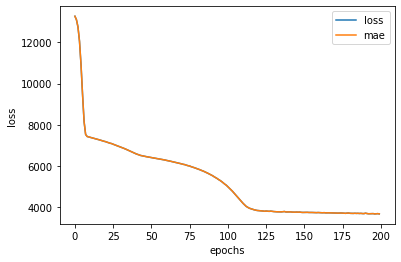

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question :** How long should you train for?
It depends... It depends on the problem  you are you are working on.However many people have asked this quetion before...so TensorFlow has the solution has solution! Its call EarlyStopping Callback. Which is a TensorFlow component you can addto you model to stop training once it stop improving a certain metric



## Preprocessing data (normalization and standardization)

In term of scaling values, neural network tend to prefer normalization.

If you are not to use which to use, you could try both and see which perform better 

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Read in the insurance dataframe
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


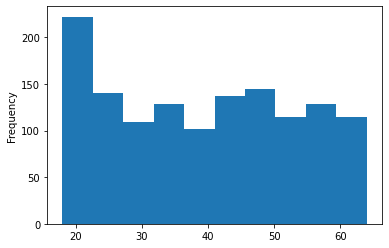

In [ ]:
X["age"].plot(kind="hist")

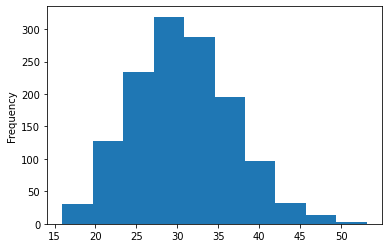

In [ ]:
X["bmi"].plot(kind="hist")

To prepare our data , we borrow a few classes from scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all these values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# Create X & Y
X=insurance.drop("charges",axis=1)
Y=insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Fit our column transformer to our training data 
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)




In [ ]:
# What does our data look like ?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalized and one hot encoded .
Now lets build a nueral nerwork on it and see how it goes

In [ ]:
# Build a neural network model to fit our normalized data 
# random seed
tf.random.set_seed(42)
# 1. Create a model 
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
# 3. fit the model
history1=insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [ ]:
# Evaluate our Insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
# Insurance model_2 results
# 9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093
# [4924.50927734375, 4924.50927734375]

Text(0.5, 0, 'epochs')

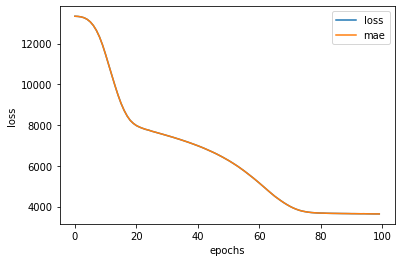

In [ ]:
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")